find high quality unique music

Problem Description:
finding unique yet great sounding music can be hard. many songs that end up on top played list get recommend to people based off what they have listened to and what they will listen to. the goal of this project will be to find the most unique song that is in this list. though the use of clustering algorithims on qualities of the music and detemining what is the most unique songs on the spotify 2023 top songs list. 

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


First I read the data in and want to filter the data and drop all columns that are not identifiers or about the sounds of the music.

In [33]:
data = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv',encoding='ISO-8859-1')
print(data.head(10))

                            track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023       

In [34]:
columns_to_drop = ['artist_count','released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','in_shazam_charts']
data = data.drop(columns=columns_to_drop)
print(data.head(10))

                            track_name              artist(s)_name  bpm key  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook  125   B   
1                                 LALA                 Myke Towers   92  C#   
2                              vampire              Olivia Rodrigo  138   F   
3                         Cruel Summer                Taylor Swift  170   A   
4                       WHERE SHE GOES                   Bad Bunny  144   A   
5                             Sprinter           Dave, Central Cee  141  C#   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma  148   F   
7                             Columbia                     Quevedo  100   F   
8                             fukumean                       Gunna  130  C#   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas  170   D   

    mode  danceability_%  valence_%  energy_%  acousticness_%  \
0  Major              80         89        83              31   


In [35]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track_name          953 non-null    object
 1   artist(s)_name      953 non-null    object
 2   bpm                 953 non-null    int64 
 3   key                 858 non-null    object
 4   mode                953 non-null    object
 5   danceability_%      953 non-null    int64 
 6   valence_%           953 non-null    int64 
 7   energy_%            953 non-null    int64 
 8   acousticness_%      953 non-null    int64 
 9   instrumentalness_%  953 non-null    int64 
 10  liveness_%          953 non-null    int64 
 11  speechiness_%       953 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 89.5+ KB


after the removal of unneeded columns for this analysis there are two object columns,mode and key, that need to be converted into numerical first we inspect for how many representations are needed by graphing the objects

<Axes: xlabel='key'>

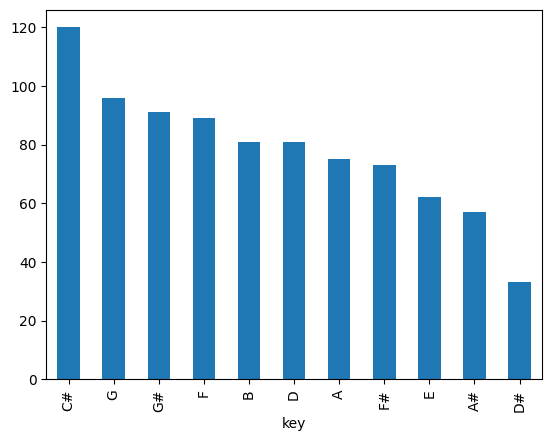

In [38]:

key_data = data['key'].value_counts()


key_data.plot(kind='bar')


looking into the key data and research around the key data I can not find a good way to represent this data so will also be droped

<Axes: xlabel='mode'>

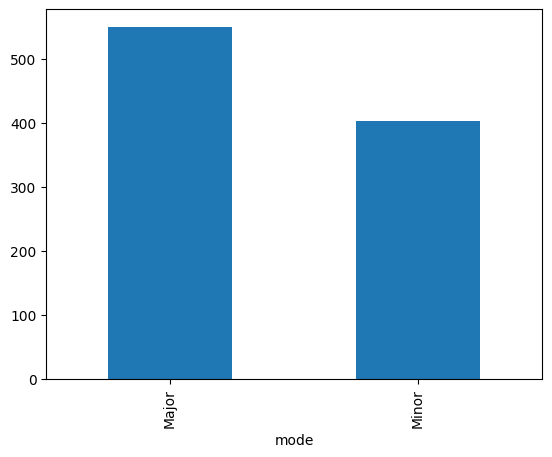

In [41]:
data = data.drop(columns='key')

mode_data = data['mode'].value_counts()
mode_data.plot(kind='bar')

for mode i am going to break down major and minor into -1 and 1 the numbers in particular are not important as in next steps I will normallize the data before running a model on them.

<Axes: xlabel='mode'>

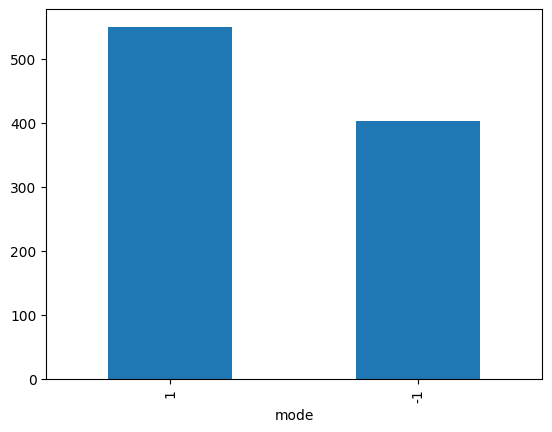

In [43]:
data.loc[data['mode'] == 'Major', 'mode'] = 1
data.loc[data['mode'] == 'Minor', 'mode'] = -1


mode_data = data['mode'].value_counts()
mode_data.plot(kind='bar')

now that we have the data we want I am going to normalize the inputs as to allow the model to find groups easier

In [48]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = ['bpm', 'mode', 'danceability_%', 'valence_%',
 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
 'speechiness_%']
scaler = StandardScaler()

data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

data.describe().T

,count,mean,std,min,25%,50%,75%,max
bpm,953.0,-2.534990e-16,1.000525,-2.051858,-0.803778,-0.054930,0.622599,2.976121
mode,953.0,1.863963e-18,1.000525,-1.168231,-1.168231,0.855995,0.855995,0.855995
danceability_%,953.0,-3.373773e-16,1.000525,-3.006892,-0.681776,0.138852,0.754324,1.985267
valence_%,953.0,1.118378e-17,1.000525,-2.021077,-0.827979,-0.018377,0.791226,1.941713
energy_%,953.0,-2.236756e-16,1.000525,-3.341776,-0.681854,0.104032,0.769012,1.978068
acousticness_%,953.0,4.846304e-17,1.000525,-1.041385,-0.810460,-0.348609,0.613579,2.691907
instrumentalness_%,953.0,-5.591889e-18,1.000525,-0.188132,-0.188132,-0.188132,-0.188132,10.638259
liveness_%,953.0,1.118378e-17,1.000525,-1.110112,-0.599314,-0.453371,0.422284,5.749185
speechiness_%,953.0,2.982341e-17,1.000525,-0.820693,-0.618829,-0.416966,0.087693,5.437076


with the inputs normalized next fiting a model to the data using kmeans and graphing the inertia to detrmine the number of clusters needed to describe the data.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

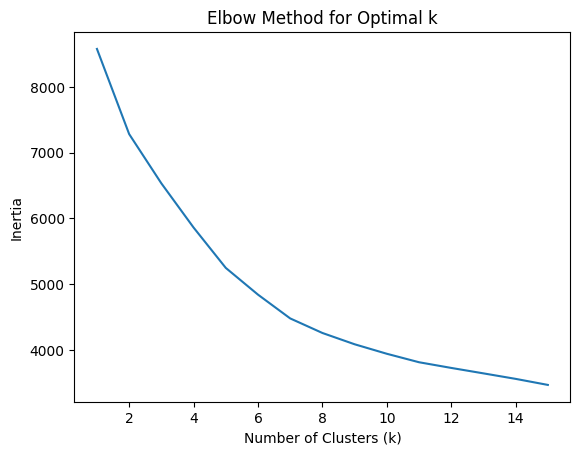

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = data[columns_to_standardize]
# ['bpm', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
inertia = []

for k in range(1,16):
    kmeans = KMeans(n_clusters=k, random_state = 123)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1,16), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

an elbow in this graph is hard to say for certian how many clusters are in this graph. from interpreting it the number of clusters would be somewhere between 6 to 8 so for purpose of this analysis going forward we will use 7 as the number of clusters

In [55]:
kmeans = KMeans(n_clusters=7, random_state = 123)
kmeans.fit(features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=123)

next is to find the songs that are the farthest from any of the clusters on average to see how well the clustering worked using the code below

In [61]:
from sklearn.metrics import pairwise_distances_argmin_min

data['cluster'] = kmeans.fit_predict(features)

distances = kmeans.transform(features)


data['max_distance'] = distances.mean(axis=1)

top_10_farthest = data.sort_values(by='max_distance', ascending=False).head(10)

print("Ten data points farthest from the centroids:")
print(top_10_farthest[['track_name','artist(s)_name','max_distance','cluster']])

Ten data points farthest from the centroids:
                                track_name  \
684                            Alien Blues   
284                          METAMORPHOSIS   
917                                 Poland   
691                                Forever   
579                                 Freaks   
909                                 Static   
4                           WHERE SHE GOES   
903  B.O.T.A. (Baddest Of Them All) - Edit   
601                   Vai Lï¿½ï¿½ Em Casa    
367                  Bombonzinho - Ao Vivo   

                                    artist(s)_name  max_distance  cluster  
684                                       Vundabar     10.332253        0  
284                                     INTERWORLD     10.241504        0  
917                                     Lil Yachty      9.291079        0  
691                                       Labrinth      8.685333        0  
579                                     Surf Curse      7.949567    

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


After listening to a few of these songs do not believe there is another way to say it but they are 'unique' give them a listen. and the goal of the analysis is complete. 

print(top_10_farthest[['track_name','artist(s)_name','max_distance','cluster']])
Ten data points farthest from the centroids:
                                track_name  \
684                            Alien Blues   
284                          METAMORPHOSIS   
917                                 Poland   
691                                Forever   
579                                 Freaks   
909                                 Static   
4                           WHERE SHE GOES   
903  B.O.T.A. (Baddest Of Them All) - Edit   
601                   Vai Lï¿½ï¿½ Em Casa    
367                  Bombonzinho - Ao Vivo   

                                    artist(s)_name  max_distance  cluster  
684                                       Vundabar     10.332253        0  
284                                     INTERWORLD     10.241504        0  
917                                     Lil Yachty      9.291079        0  
691                                       Labrinth      8.685333        0  
579                                     Surf Curse      7.949567        0  
909                                     Steve Lacy      7.811546        0  
4                                        Bad Bunny      7.188516        0  
903            Interplanetary Criminal, Eliza Rose      7.088245        0  
601  Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &      7.073637        3  
367                 Israel & Rodolffo, Ana Castela      6.524409        3  